In [2]:
!pip install -Uqq fastai
!pip install -Uqq ipywidgets==7.7.2

In [3]:
from fastai.vision.all import *
from ipywidgets import *

In [4]:
path = Path("/kaggle/input/facial-age/face_age")
images = get_image_files(path)
images

(#19556) [Path('/kaggle/input/facial-age/face_age/057/6802.png'),Path('/kaggle/input/facial-age/face_age/057/3702.png'),Path('/kaggle/input/facial-age/face_age/057/8810.png'),Path('/kaggle/input/facial-age/face_age/057/6759.png'),Path('/kaggle/input/facial-age/face_age/057/1846.png'),Path('/kaggle/input/facial-age/face_age/057/7216.png'),Path('/kaggle/input/facial-age/face_age/057/3028.png'),Path('/kaggle/input/facial-age/face_age/057/5568.png'),Path('/kaggle/input/facial-age/face_age/057/5630.png'),Path('/kaggle/input/facial-age/face_age/057/3444.png')...]

In [5]:
# count = 0
# for image in images:
#     if '001' in str(image):
#         count += 1
# count

def is_baby_or_senior(image):
    age = int(image.parent.name)
    return age < 15 or age > 59

# for image in images:
#     if int(image.parent.name) == 70:
#         res = is_baby_or_senior(image)
#         print(image, res)

In [6]:
dls = ImageDataLoaders.from_path_func(path, images, valid_pct=0.2, seed=42, label_func=is_baby_or_senior, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 134MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.523901,0.400769,0.169010,01:18


epoch,train_loss,valid_loss,error_rate,time
0,0.253699,0.162855,0.065712,01:32
1,0.112159,0.107160,0.036052,01:32
2,0.036447,0.081444,0.021222,01:31
3,0.009760,0.066854,0.017898,01:31


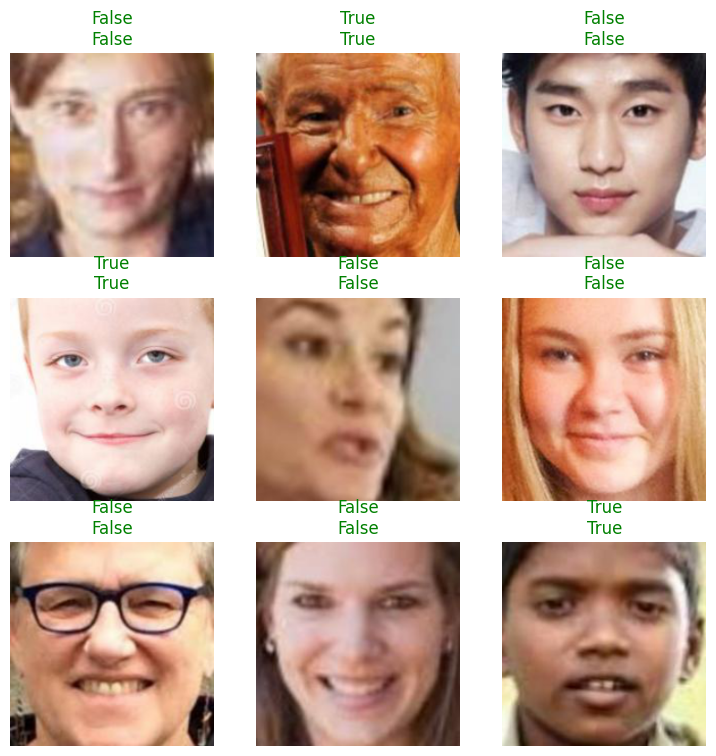

In [8]:
learn.show_results()

In [86]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [87]:
test_image = PILImage.create(uploader.data[0])
pred, _, prob = learn.predict(test_image)

print(pred, prob[0])

if prob[0] < 0.5:
    print("Slow down the pace of escalator")
else:
    print("No change in pace of escalator")

False tensor(0.9831)
No change in pace of escalator
